<a href="https://colab.research.google.com/github/TJ1810/case-study/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data collection form Kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns
from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter
%matplotlib inline

I did data cleaning manually

In [ ]:
df = pd.read_csv("cleaned_data.csv")

Exploratory data analytics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24798 entries, 0 to 24797
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   24798 non-null  object 
 1   entity_type          24798 non-null  object 
 2   name                 24797 non-null  object 
 3   permalink            24798 non-null  object 
 4   category_code        24035 non-null  object 
 5   status               24798 non-null  object 
 6   founded_at           19854 non-null  object 
 7   closed_at            1451 non-null   object 
 8   homepage_url         23751 non-null  object 
 9   description          14511 non-null  object 
 10  overview             24593 non-null  object 
 11  tag_list             10462 non-null  object 
 12  country_code         24798 non-null  object 
 13  state_code           17372 non-null  object 
 14  city                 24798 non-null  object 
 15  region               24798 non-null 

In [ ]:
df.head()

,id,entity_type,name,permalink,category_code,status,founded_at,closed_at,homepage_url,description,...,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,ROI
0,c:1,Company,Wetpaint,/company/wetpaint,web,operating,17/10/2005,NaN,http://wetpaint-inc.com,Technology Platform Company,...,3,39750000,05/09/2010,18/09/2013,5.0,17.0,initial-importer,25/05/2007 06:51,13/04/2013 03:29,15.5
1,c:1001,Company,FriendFeed,/company/friendfeed,web,acquired,01/10/2007,NaN,http://friendfeed.com,Social network aggregator,...,1,5000000,01/05/2008,13/09/2012,3.0,14.0,initial-importer,01/10/2007 10:17,13/03/2013 21:44,9.5
2,c:10015,Company,Fitbit,/company/fitbit,health,operating,01/10/2007,NaN,http://www.fitbit.com,NaN,...,5,68069200,NaN,NaN,NaN,14.0,NaN,25/08/2008 02:16,04/12/2013 09:52,NaN
3,c:100155,Company,MTPV,/company/mtpv,cleantech,operating,01/01/2003,NaN,http://www.mtpv.com,NaN,...,3,10125293,01/01/2010,01/01/2010,1.0,6.0,arun,07/09/2011 02:01,10/04/2013 04:35,NaN
4,c:10018,Company,Demandbase,/company/demandbase,analytics,operating,01/01/2006,NaN,http://www.demandbase.com,NaN,...,3,33000000,18/05/2010,01/03/2013,3.0,19.0,jason,25/08/2008 03:35,23/10/2013 11:32,NaN


In [ ]:
df.tail()

,id,entity_type,name,permalink,category_code,status,founded_at,closed_at,homepage_url,description,...,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,ROI
24793,c:9977,Company,Carticipate,/company/carticipate,mobile,closed,22/05/2008,15/08/2012,http://www.carticipate.com,iPhone ride sharing application,...,1,130000,03/08/2008,01/09/2009,2.0,3.0,NaN,24/08/2008 05:43,04/10/2013 07:11,NaN
24794,c:99853,Company,ChatterBlock,/company/chatterblock,social,operating,11/01/2011,NaN,http://www.chatterblock.com,Social Media Website,...,1,500000,11/01/2011,11/01/2011,1.0,2.0,NaN,06/09/2011 22:04,24/09/2011 13:07,NaN
24795,c:9989,Company,Shattered Reality Interactive,/company/shattered-reality-interactive,games_video,closed,01/06/2006,03/07/2012,http://www.srinteractive.com,"Online Social Gaming, MMO",...,2,1100000,01/11/2005,10/09/2008,2.0,4.0,NaN,24/08/2008 09:56,21/10/2013 06:04,NaN
24796,c:9995,Company,FohBoh,/company/fohboh,public_relations,operating,01/11/2007,NaN,http://www.fohboh.com,Foodservice industry social-busi network,...,1,750000,01/05/2013,01/05/2013,1.0,14.0,NaN,24/08/2008 15:46,28/06/2013 20:55,NaN
24797,c:9998,Company,Closet Couture,/company/closet-couture,ecommerce,operating,01/09/2007,NaN,http://www.closetcouture.com,Online fashon community,...,1,475000,01/07/2006,10/09/2008,2.0,1.0,NaN,24/08/2008 16:46,23/03/2013 12:01,NaN


In [ ]:
df.dropna()

,id,entity_type,name,permalink,category_code,status,founded_at,closed_at,homepage_url,description,...,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,ROI


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['id', 'entity_type', 'name', 'permalink', 'category_code', 'status',
       'founded_at', 'closed_at', 'homepage_url', 'description', 'overview',
       'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', ' ROI '],
      dtype='object')

In [ ]:
df.isna().sum()

id                         0
entity_type                0
name                       1
permalink                  0
category_code            763
status                     0
founded_at              4944
closed_at              23347
homepage_url            1047
description            10287
overview                 205
tag_list               14336
country_code               0
state_code              7426
city                       0
region                     0
first_investment_at    24572
last_investment_at     24572
investment_rounds      24572
invested_companies     24572
first_funding_at          54
last_funding_at           54
funding_rounds             0
funding_total_usd          0
first_milestone_at     10970
last_milestone_at      10970
milestones             10970
relationships           4313
created_by              3773
created_at                 0
updated_at                 0
 ROI                   24123
dtype: int64

In [ ]:
df.isnull().values.any()

True

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.describe().round(2)

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
count,226.00,226.00,24798.00,2.479800e+04,13828.00,20485.00
mean,8.00,7.26,1.79,1.554958e+07,1.67,5.72
std,38.61,36.23,1.29,7.039031e+07,0.90,13.66
min,1.00,1.00,1.00,2.910000e+02,1.00,1.00
25%,1.00,1.00,1.00,6.000000e+05,1.00,2.00
50%,1.00,1.00,1.00,3.000000e+06,1.00,3.00
75%,3.00,3.00,2.00,1.200000e+07,2.00,6.00
max,478.00,459.00,15.00,5.700000e+09,9.00,1046.00


In [ ]:
df.isna().values.any()

True

In [ ]:
df.mean()

<ipython-input-16-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


investment_rounds     8.000000e+00
invested_companies    7.256637e+00
funding_rounds        1.785023e+00
funding_total_usd     1.554958e+07
milestones            1.670957e+00
relationships         5.718965e+00
dtype: float64

In [ ]:
df.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
df.shape

(19475, 31)

In [ ]:
df.shape

(19475, 31)

In [ ]:
df['investment_rounds'] = df['investment_rounds'].fillna(df['investment_rounds'].median())

In [ ]:
df['invested_companies'].value_counts()

1.0      120
2.0       17
3.0       12
5.0        8
7.0        6
6.0        4
18.0       2
8.0        2
14.0       2
4.0        2
9.0        1
38.0       1
26.0       1
16.0       1
268.0      1
30.0       1
20.0       1
73.0       1
459.0      1
79.0       1
11.0       1
33.0       1
47.0       1
57.0       1
Name: invested_companies, dtype: int64

In [ ]:
df['invested_companies'] = df['invested_companies'].fillna(df['invested_companies'].median())


In [ ]:
df['funding_rounds'].value_counts()

1     10622
2      4514
3      2233
4      1057
5       540
6       233
7       134
8        62
9        40
10       20
11       10
13        4
12        3
15        2
14        1
Name: funding_rounds, dtype: int64

In [ ]:
df['funding_rounds'] = df['funding_rounds'].fillna(df['funding_rounds'].median())


In [ ]:
df['funding_total_usd'] = df['funding_total_usd'].fillna(df['funding_total_usd'].mean())


In [ ]:
df['milestones'].value_counts()


1.0    6403
2.0    3635
3.0    1708
4.0     323
5.0     108
6.0      35
7.0       6
8.0       3
9.0       1
Name: milestones, dtype: int64

In [ ]:
df['milestones'] = df['milestones'].fillna(df['milestones'].mode()[0])

In [ ]:
df['relationships'].value_counts()


2.0      2957
1.0      2730
3.0      2608
4.0      1807
5.0      1260
         ... 
59.0        1
108.0       1
65.0        1
119.0       1
67.0        1
Name: relationships, Length: 88, dtype: int64

In [ ]:
df['relationships'] = df['relationships'].fillna(df['relationships'].mean())


In [ ]:
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['founded_at'] = df['founded_at'].dt.year

<ipython-input-29-34e885e49354>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['founded_at'] = pd.to_datetime(df['founded_at'])


In [ ]:
df['founded_at'] = df['founded_at'].fillna(df['founded_at'].mode()[0])


In [ ]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['closed_at'] = df['closed_at'].dt.year

<ipython-input-31-0159afcc590b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['closed_at'] = pd.to_datetime(df['closed_at'])


In [ ]:
df['closed_at'].mode()[0]

2012.0

In [ ]:
for i in df['status']:
    if (i == 'operating' or 'ipo'):
        df['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        df['closed_at'].fillna(2012, inplace = True)

In [ ]:
created = []
for i in df['created_at']:
    created.append(i.split('-')[0])
df['created_at']= created

In [ ]:
df.reset_index(inplace = True)

Normal distribution

<ipython-input-35-e708e38007cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],color='#22b199',ax=axes[0])


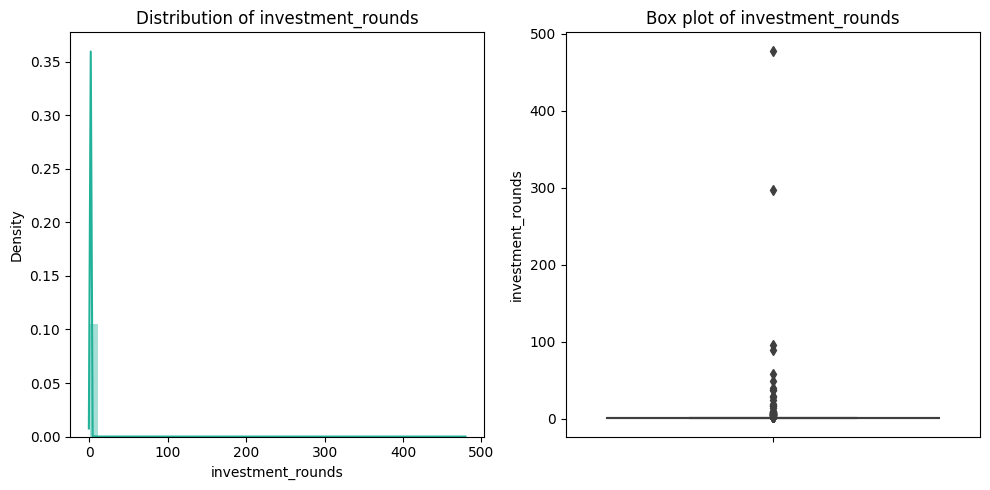

<ipython-input-35-e708e38007cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],color='#22b199',ax=axes[0])


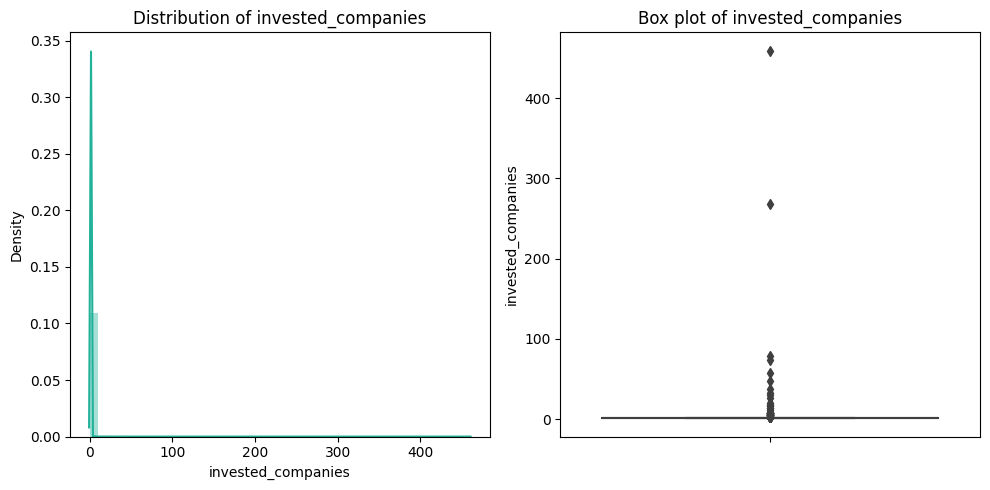

<ipython-input-35-e708e38007cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],color='#22b199',ax=axes[0])


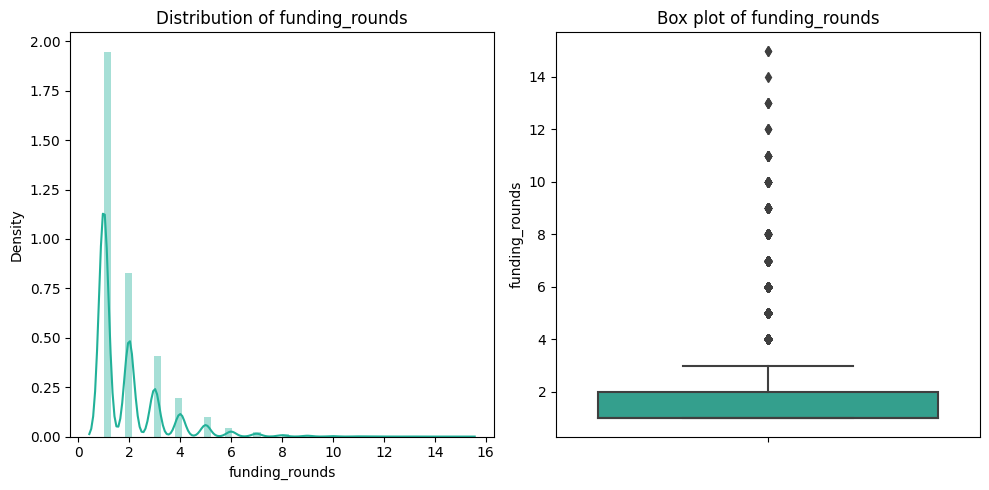

<ipython-input-35-e708e38007cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],color='#22b199',ax=axes[0])


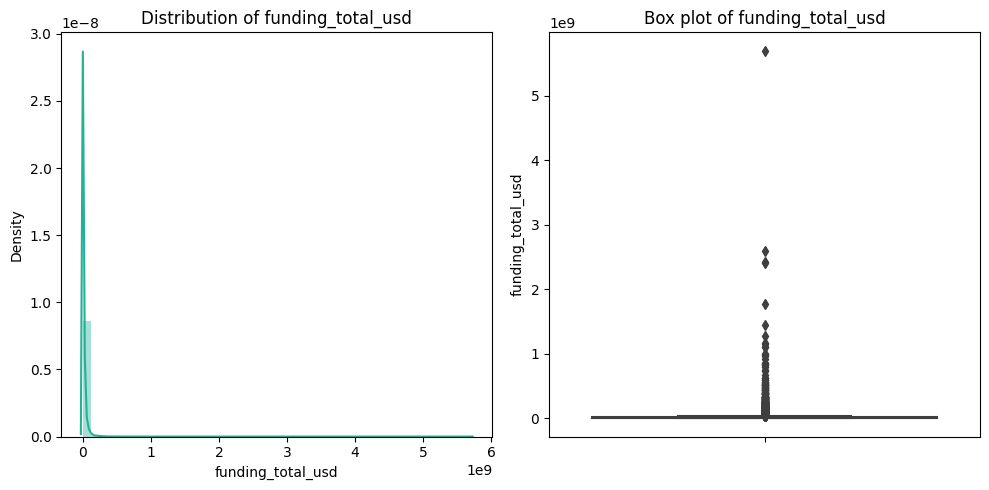

<ipython-input-35-e708e38007cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],color='#22b199',ax=axes[0])


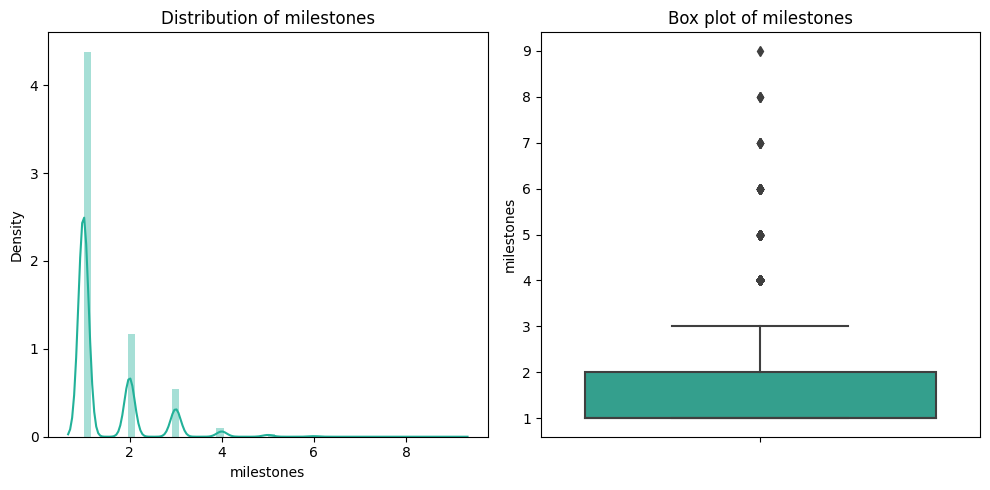

<ipython-input-35-e708e38007cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],color='#22b199',ax=axes[0])


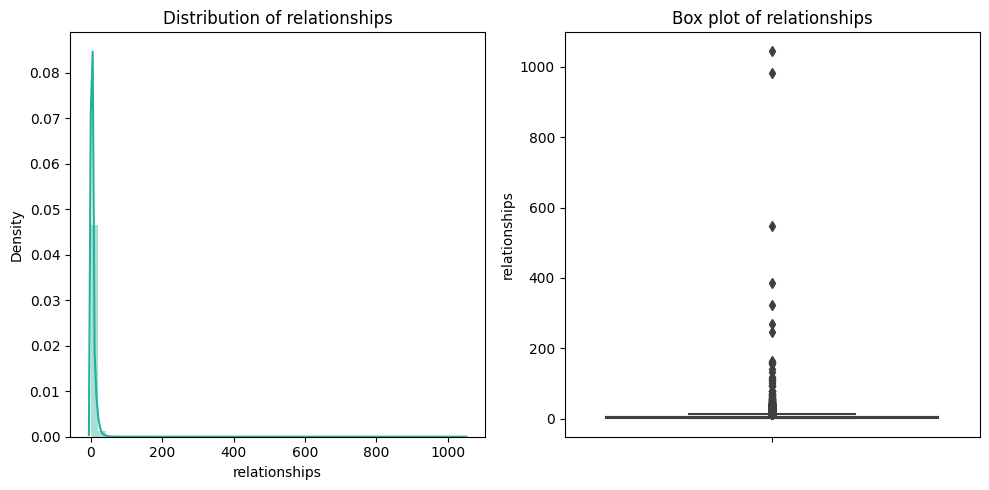

(19475, 31)


In [ ]:
def check_outliers(x):
    global df
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=df[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships']:
    check_outliers(i)

print(df.shape)

Correlation

In [ ]:
df_corr = df.corr().abs()

<ipython-input-36-08ebbaa5835e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().abs()


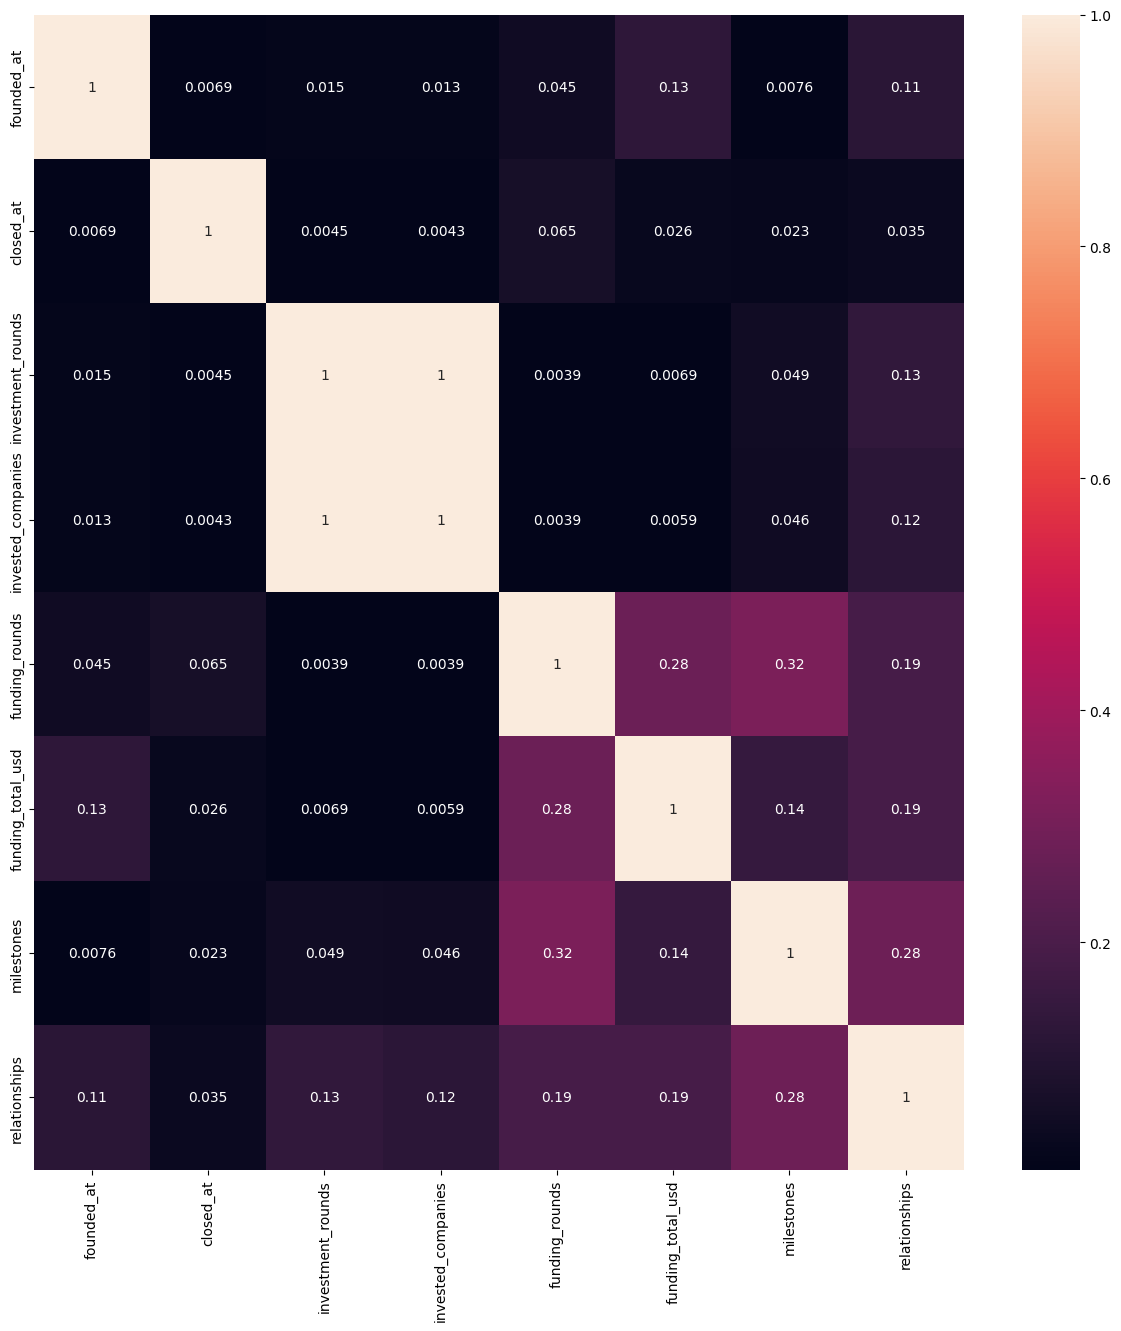

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)
plt.show()

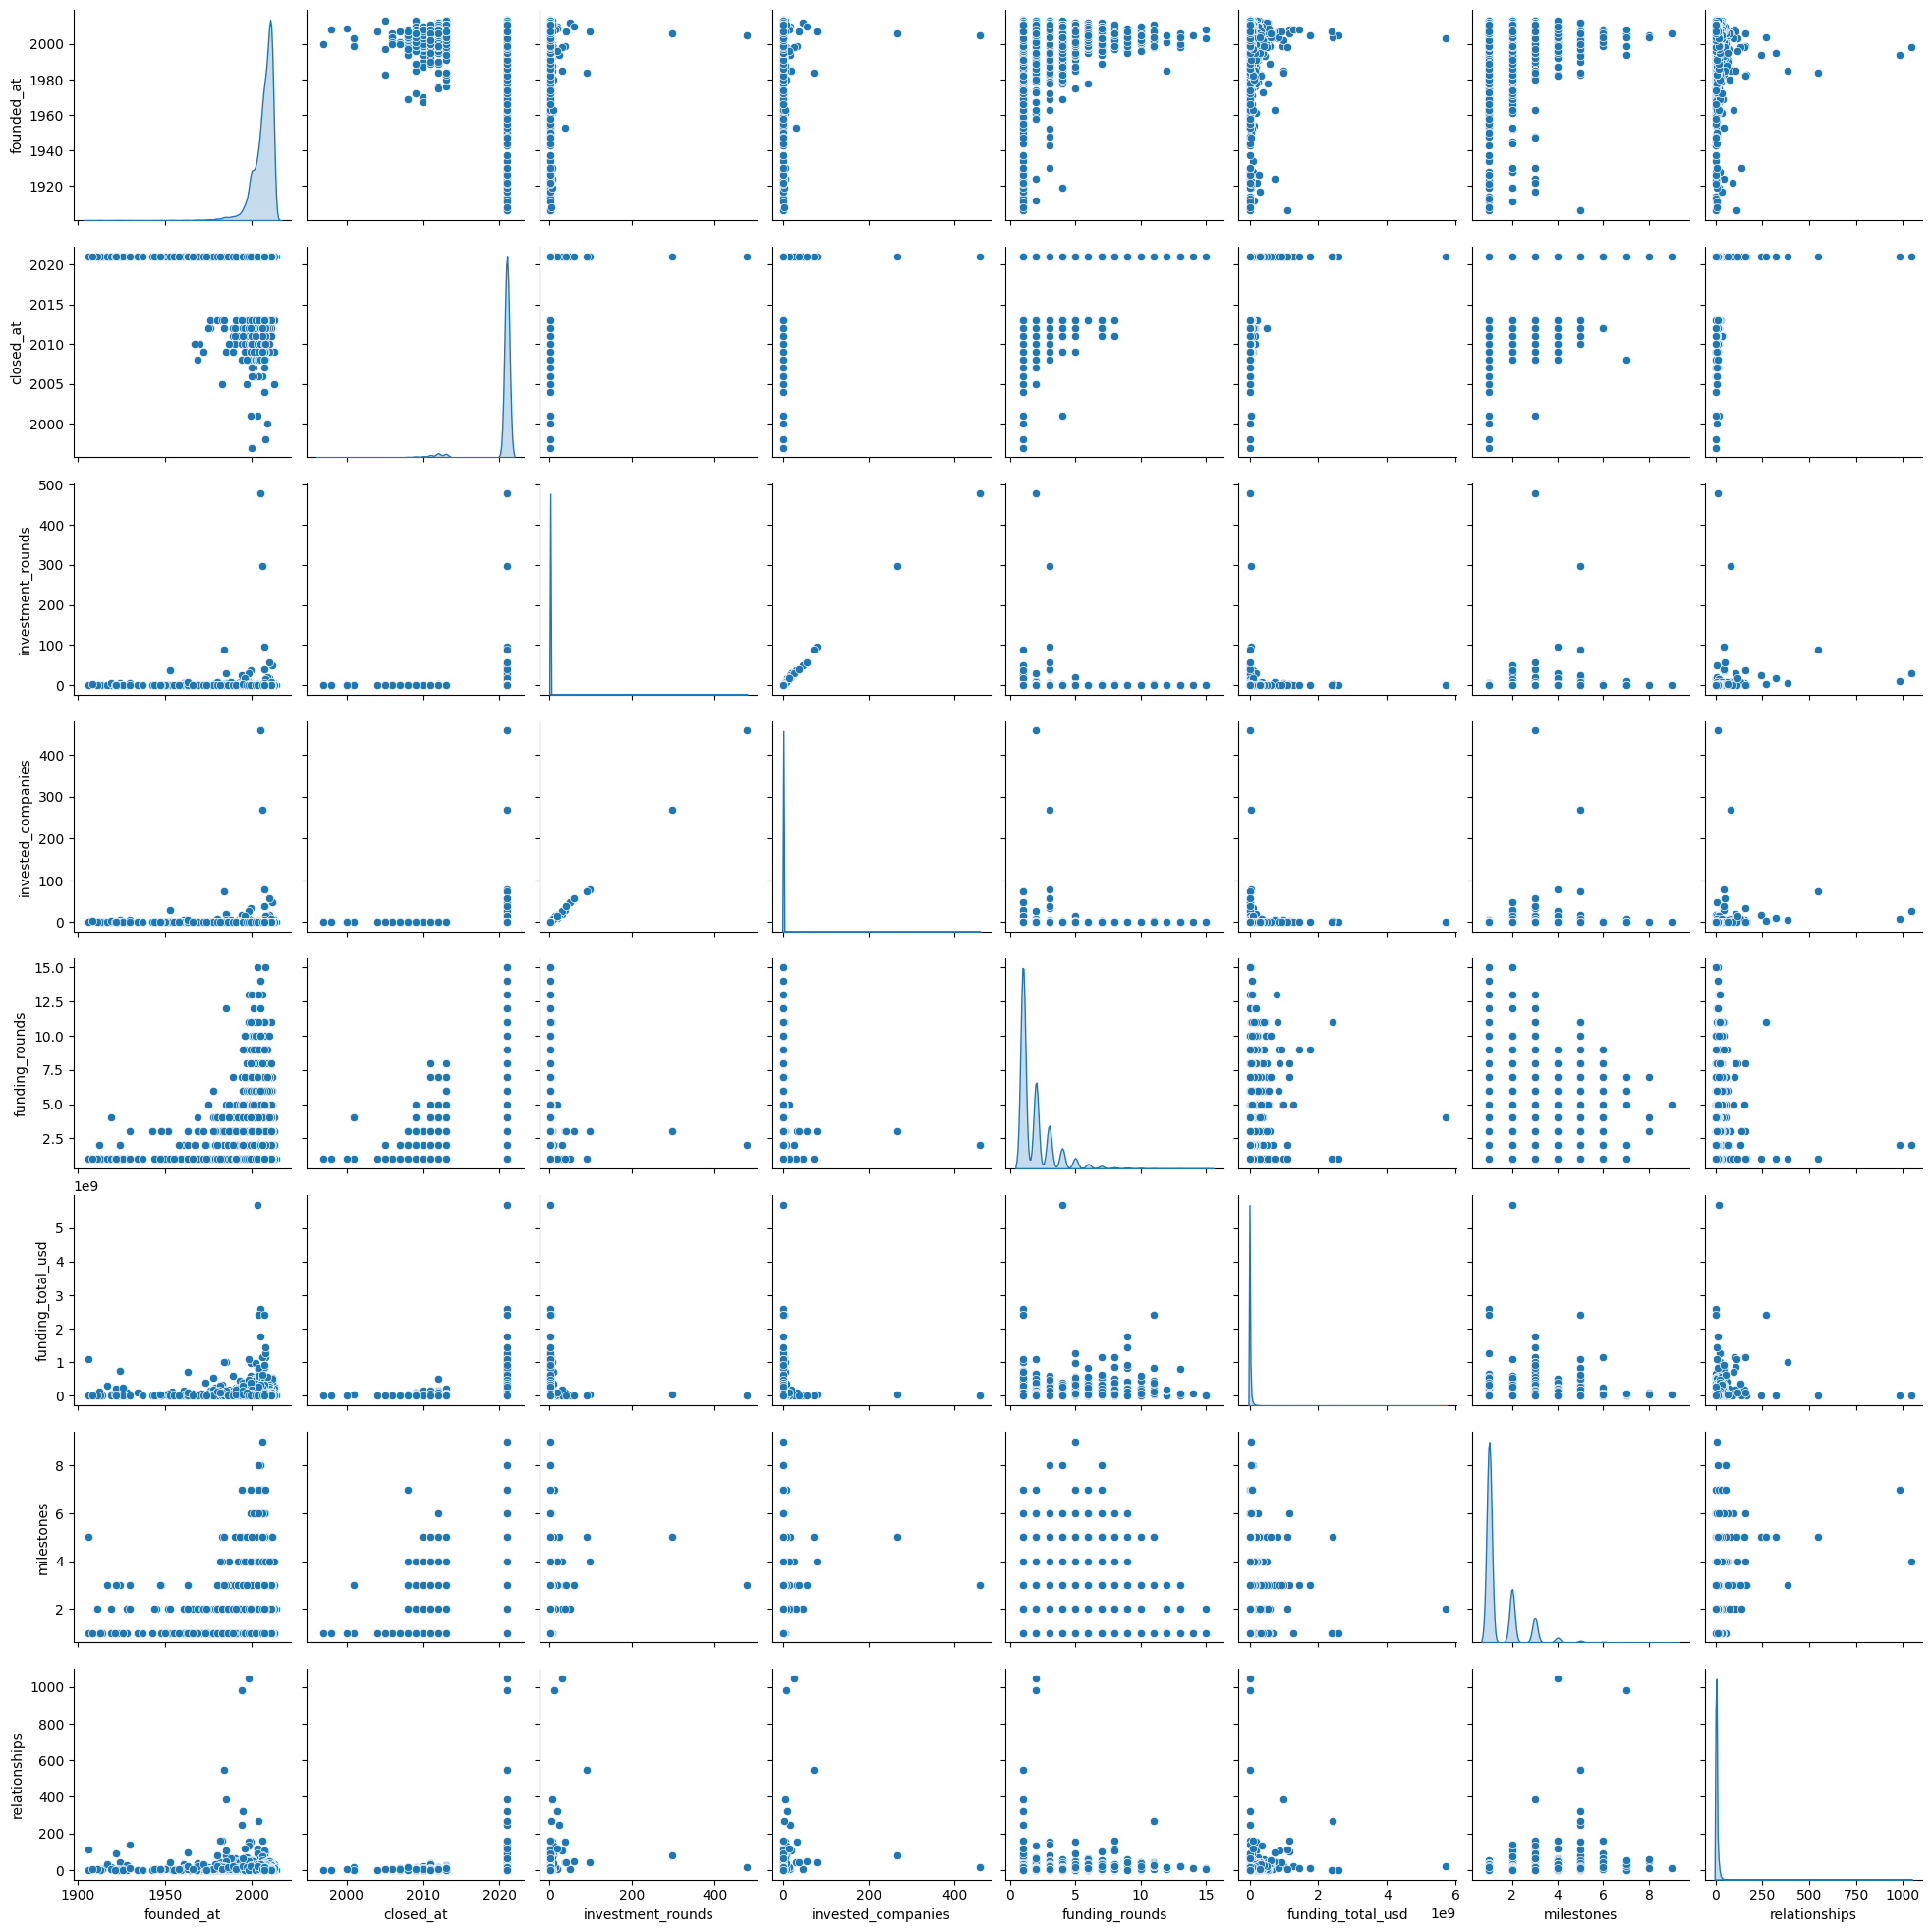

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Data visualisation

In [ ]:
def plot(x,y,data):
    plt.figure(figsize=(20,20))
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

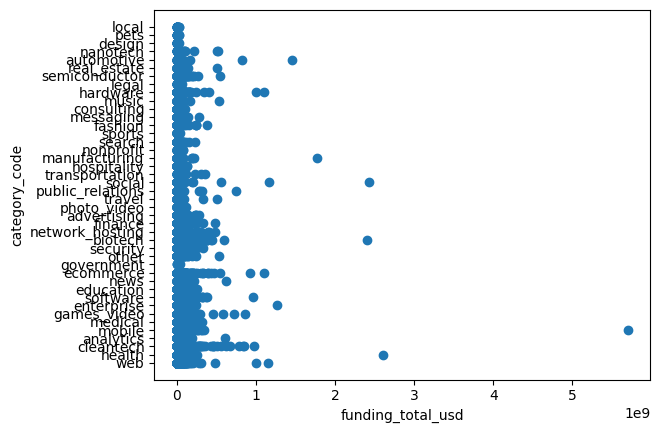

In [ ]:
plt.scatter(df['funding_total_usd'], df['category_code'])
plt.xlabel('funding_total_usd')
plt.ylabel('category_code')
plt.show()

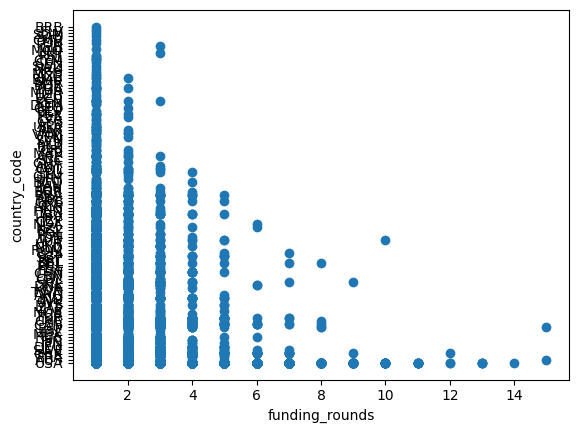

In [ ]:
plt.scatter(df['funding_rounds'], df['country_code'])
plt.xlabel('funding_rounds')
plt.ylabel('country_code')
plt.show()

Text analysis

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer() #Initialize the sentiment analyzer

##Apply the sentiment analyzer to each headline and calculate the sentiment polarity
sentiments = []
for headline in df['overview']:
    if pd.isnull(headline): #cheack for null values
      polarity = 0.0  #Assign a neutral polarity for null values
    else:
      headline_str = str(headline) #convert headline to a string
      polarity = sia.polarity_scores(headline_str)['compound']
    sentiments.append(polarity)

# add sentiment polarity values to the DataFrame
df['polarity'] = sentiments

# Display the DataFrame with sentiment polarity values
print(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


      entity_type                           name  \
0         Company                       Wetpaint   
1         Company                     FriendFeed   
2         Company                         Fitbit   
3         Company                           MTPV   
4         Company                     Demandbase   
...           ...                            ...   
24793     Company                    Carticipate   
24794     Company                   ChatterBlock   
24795     Company  Shattered Reality Interactive   
24796     Company                         FohBoh   
24797     Company                 Closet Couture   

                                    permalink     category_code     status  \
0                           /company/wetpaint               web  operating   
1                         /company/friendfeed               web   acquired   
2                             /company/fitbit            health  operating   
3                               /company/mtpv         cleantech

In [ ]:
df.dropna(subset=['overview'], inplace=True)

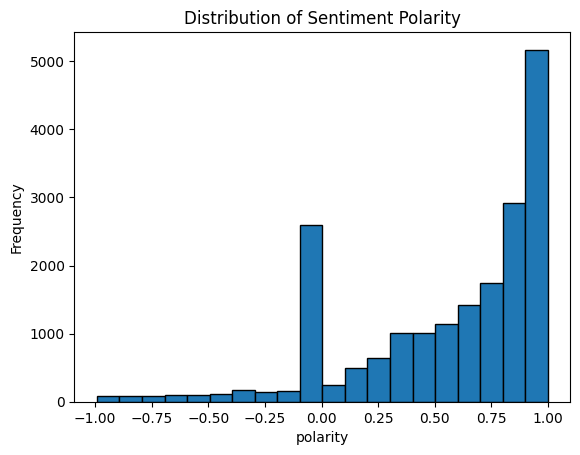

In [ ]:
plt.hist(df['polarity'], bins=20, edgecolor='black')
plt.xlabel('polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
# download the required resources from nltk
nltk.download('stopwords') # download the required resources from nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
all_headlines = ' '.join(df['overview']) #combine all the headline into a single string

stopwords = set(stopwords.words('english'))

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(all_headlines)

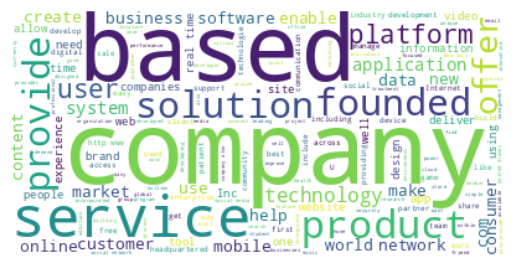

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Engineering

In [ ]:
# Convert the columns to appropriate numeric types
df["first_funding_at"] = pd.to_numeric(df["first_funding_at"], errors="coerce")
df["last_funding_at"] = pd.to_numeric(df["last_funding_at"], errors="coerce")
df["funding_rounds"] = pd.to_numeric(df["funding_rounds"], errors="coerce")

# Handle missing or invalid values
df["first_funding_at"].fillna(0, inplace=True)
df["last_funding_at"].fillna(0, inplace=True)
df["funding_rounds"].fillna(0, inplace=True)

# Calculate the duration of funding for each company
df["Duration_of_funding"] = (df["last_funding_at"] - df["first_funding_at"]) / df["funding_rounds"]

# Calculate the number of unique company names
company_name_count = df["name"].nunique()

# Display the results
print("Duration of Funding:\n", df["Duration_of_funding"])
print("Number of Unique Company Names:", company_name_count)

Duration of Funding:
 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
24793    0.0
24794    0.0
24795    0.0
24796    0.0
24797    0.0
Name: Duration_of_funding, Length: 19416, dtype: float64
Number of Unique Company Names: 19416


In [ ]:
print(df.columns)

Index(['entity_type', 'name', 'permalink', 'category_code', 'status',
       'founded_at', 'closed_at', 'homepage_url', 'description', 'overview',
       'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', ' ROI ', 'polarity', 'Duration_of_funding'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 24797
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entity_type          19416 non-null  object 
 1   name                 19416 non-null  object 
 2   permalink            19416 non-null  object 
 3   category_code        19416 non-null  object 
 4   status               19416 non-null  object 
 5   founded_at           19416 non-null  int64  
 6   closed_at            19416 non-null  float64
 7   homepage_url         18836 non-null  object 
 8   description          12942 non-null  object 
 9   overview             19416 non-null  object 
 10  tag_list             9779 non-null   object 
 11  country_code         19416 non-null  object 
 12  state_code           13767 non-null  object 
 13  city                 19416 non-null  object 
 14  region               19416 non-null  object 
 15  first_investment_at  189 non-null   

In [ ]:
df.head()

,entity_type,name,permalink,category_code,status,founded_at,closed_at,homepage_url,description,overview,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,ROI,polarity,Duration_of_funding
0,Company,Wetpaint,/company/wetpaint,web,operating,2005,2021.0,http://wetpaint-inc.com,Technology Platform Company,Wetpaint is a technology platform company that...,...,05/09/2010,18/09/2013,5.0,17.0,initial-importer,25/05/2007 06:51,13/04/2013 03:29,15.5,0.0000,0.0
1,Company,FriendFeed,/company/friendfeed,web,acquired,2007,2021.0,http://friendfeed.com,Social network aggregator,[FriendFeed](http://www.friendfeed.com) aims t...,...,01/05/2008,13/09/2012,3.0,14.0,initial-importer,01/10/2007 10:17,13/03/2013 21:44,9.5,0.4939,0.0
2,Company,Fitbit,/company/fitbit,health,operating,2007,2021.0,http://www.fitbit.com,NaN,"Fitbit inspires people to exercise more, eat b...",...,NaN,NaN,1.0,14.0,NaN,25/08/2008 02:16,04/12/2013 09:52,NaN,0.9815,0.0
3,Company,MTPV,/company/mtpv,cleantech,operating,2003,2021.0,http://www.mtpv.com,NaN,MTPV Corporation is a clean energy company foc...,...,01/01/2010,01/01/2010,1.0,6.0,arun,07/09/2011 02:01,10/04/2013 04:35,NaN,0.5859,0.0
4,Company,Demandbase,/company/demandbase,analytics,operating,2006,2021.0,http://www.demandbase.com,NaN,Demandbase is the first targeting and personal...,...,18/05/2010,01/03/2013,3.0,19.0,jason,25/08/2008 03:35,23/10/2013 11:32,NaN,0.0000,0.0


In [ ]:
df.tail()

,entity_type,name,permalink,category_code,status,founded_at,closed_at,homepage_url,description,overview,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,ROI,polarity,Duration_of_funding
24793,Company,Carticipate,/company/carticipate,mobile,closed,2008,2012.0,http://www.carticipate.com,iPhone ride sharing application,Carticipate on the iPhone is the first ride sh...,...,03/08/2008,01/09/2009,2.0,3.0,NaN,24/08/2008 05:43,04/10/2013 07:11,NaN,0.8360,0.0
24794,Company,ChatterBlock,/company/chatterblock,social,operating,2011,2021.0,http://www.chatterblock.com,Social Media Website,ChatterBlock is a website that helps parents c...,...,11/01/2011,11/01/2011,1.0,2.0,NaN,06/09/2011 22:04,24/09/2011 13:07,NaN,0.9831,0.0
24795,Company,Shattered Reality Interactive,/company/shattered-reality-interactive,games_video,closed,2006,2012.0,http://www.srinteractive.com,"Online Social Gaming, MMO",Shattered Reality was founded in 2006 with the...,...,01/11/2005,10/09/2008,2.0,4.0,NaN,24/08/2008 09:56,21/10/2013 06:04,NaN,0.9880,0.0
24796,Company,FohBoh,/company/fohboh,public_relations,operating,2007,2021.0,http://www.fohboh.com,Foodservice industry social-busi network,"Online B2B Community - Food, Tech & Media\nWit...",...,01/05/2013,01/05/2013,1.0,14.0,NaN,24/08/2008 15:46,28/06/2013 20:55,NaN,0.0000,0.0
24797,Company,Closet Couture,/company/closet-couture,ecommerce,operating,2007,2021.0,http://www.closetcouture.com,Online fashon community,"Closet Couture is an online fashion community,...",...,01/07/2006,10/09/2008,2.0,1.0,NaN,24/08/2008 16:46,23/03/2013 12:01,NaN,0.8720,0.0


Linear regression

In [ ]:
df2=df[["investment_rounds", "invested_companies"]]

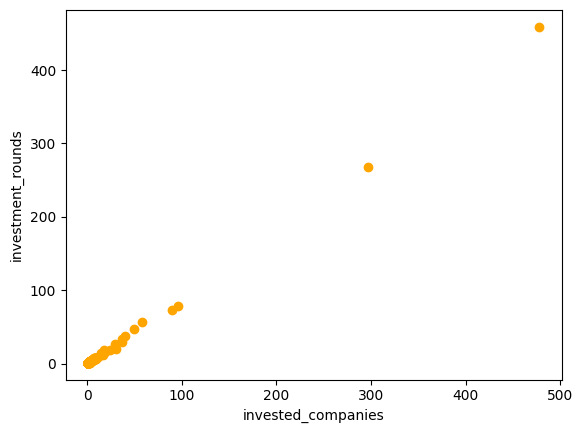

In [ ]:
plt.scatter(df2["investment_rounds"], df2["invested_companies"], color="orange") #Create a scatter plot
plt.xlabel("invested_companies")        #Set the x-axis label
plt.ylabel("investment_rounds")      #Set the y-axis label
plt.show()                      #Display the scatter plot

In [ ]:
train = df2[:(int((len(df2)*0.8)))]     #Split the dataframe into training and test sets
test = df2[(int((len(df2)*0.8))):]

In [ ]:
regr = linear_model.LinearRegression()       #Create a linear regression model

train_x=np.array(train[['invested_companies']])      #Prepare the training data
train_y=np.array(train[['investment_rounds']])

regr.fit(train_x, train_y)                     #Train the linear regression model

print ("coefficients :",regr.coef_)
print ("Intercept :",regr.intercept_)

coefficients : [[1.06655522]]
Intercept : [-0.06201419]


Text(0, 0.5, 'investment_rounds')

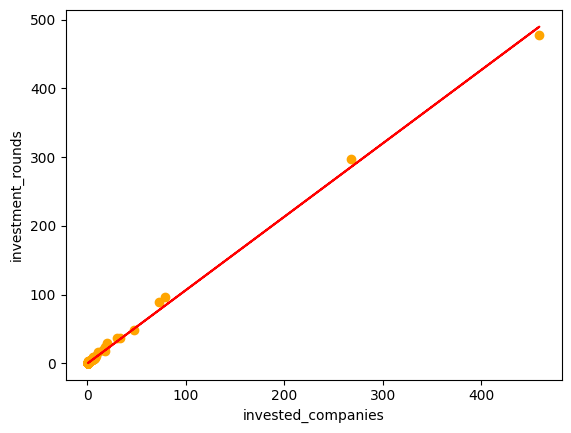

In [ ]:
plt.scatter(train["invested_companies"], train["investment_rounds"], color="orange")  #Create a scatter plot of the training data
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')             #Plot the regression line
plt.xlabel("invested_companies")       #Set the x-axis label
plt.ylabel("investment_rounds")         #Set the y-axis label

In [ ]:
def get_regression_predictions(Input_features,intercept,slope): #predicted value : #Function for prediction value
  predicted_values = Input_features*slope + intercept

  return predicted_values

In [ ]:
from sklearn.metrics import r2_score

test_x = np.array(test[['invested_companies']])         #Prepare the test data
test_y = np.array(test[['investment_rounds']])       #Make predictions on the test data using the trained model
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))    #Calculate and print the mean absolute error,sum of squares (MSE),R2-score
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.01
Mean sum of squares (MSE): 0.00
R2-score: 1.00


KNN

In [ ]:
df.groupby('name').size()    #Group the dataframe by the 'species' column and calculate the size of each group


name
#NAME?               1
#waywire             1
(In)Touch Network    1
.Club Domains        1
1-800-DOCTORS        1
                    ..
zerved               1
zipcodemailer.com    1
zozi                 1
zulily               1
zweitgeist           1
Length: 19416, dtype: int64

In [ ]:
features_columns = ['invested_companies', 'investment_rounds'] #Define the list of feature columns
X = df[features_columns].values      #Extract the feature values (X) from the dataframe
y = df["name"].values            #Extract the feature values (y) from the dataframe

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()       #Create an instance of LabelEncoder
y = le.fit_transform(y)   #Apply LabelEncoder to transform the target values (y)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure()                   #Create a new figure for the pair plot
sns.pairplot(df, hue="name", size=3, markers=["o", "s", "D"])      #Create a pair plot using seaborn
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,random_state = 10,test_size=0.35)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
acc_score =[]
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn,X_train,Y_train,cv=2)
    acc_score.append(score.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversi

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=7)
knn_2.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
predict_2 = knn_2.predict(X_test)
print(accuracy_score(predict_2,Y_test))

0.9972411256207467


In [ ]:
print(confusion_matrix(predict_2,Y_test))

[[5416    2    1    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    3    1    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    1    1    1    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    2    2    1    0    1    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    1    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    1
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
print(classification_report(Y_test,predict_2))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      5416
         2.0       0.75      0.60      0.67         5
         3.0       0.33      0.33      0.33         3
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         3
         6.0       0.33      1.00      0.50         2
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        89.0       0.00      0.00      0.00         1
       297.0       0.00      0.00      0.00         1

    accuracy                           1.00      5437
   macro avg       0.15   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.